## Fertilizer Recommendation

Dataset download from [Keggle](https://www.kaggle.com/datasets/nishchalchandel/fertilizer-recommendation/data)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [2]:
df = pd.read_csv('fertilizer_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  3100 non-null   float64
 1   Moisture     3100 non-null   float64
 2   Rainfall     3100 non-null   float64
 3   PH           3100 non-null   float64
 4   Nitrogen     3100 non-null   float64
 5   Phosphorous  3100 non-null   float64
 6   Potassium    3100 non-null   float64
 7   Carbon       3100 non-null   float64
 8   Soil         3100 non-null   object 
 9   Crop         3100 non-null   object 
 10  Fertilizer   3100 non-null   object 
 11  Remark       3100 non-null   object 
dtypes: float64(8), object(4)
memory usage: 290.8+ KB


In [4]:
df.head()

,Temperature,Moisture,Rainfall,PH,Nitrogen,Phosphorous,Potassium,Carbon,Soil,Crop,Fertilizer,Remark
0,50.179845,0.725893,205.600816,6.227358,66.701872,76.963560,96.429065,0.496300,Loamy Soil,rice,Compost,Enhances organic matter and improves soil stru...
1,21.633318,0.721958,306.081601,7.173131,71.583316,163.057636,148.128347,1.234242,Loamy Soil,rice,Balanced NPK Fertilizer,"Provides a balanced mix of nitrogen, phosphoru..."
2,23.060964,0.685751,259.336414,7.380793,75.709830,62.091508,80.308971,1.795650,Peaty Soil,rice,Water Retaining Fertilizer,Improves water retention in dry soils. Prefer ...
3,26.241975,0.755095,212.703513,6.883367,78.033687,151.012521,153.005712,1.517556,Loamy Soil,rice,Balanced NPK Fertilizer,"Provides a balanced mix of nitrogen, phosphoru..."
4,21.490157,0.730672,268.786767,7.578760,71.765123,66.257371,97.000886,1.782985,Peaty Soil,rice,Organic Fertilizer,"Enhances fertility naturally, ideal for peaty ..."


In [5]:
df.nunique()

Temperature    2947
Moisture       2960
Rainfall       2950
PH             2961
Nitrogen       2947
Phosphorous    2948
Potassium      2945
Carbon         2940
Soil              5
Crop             31
Fertilizer       10
Remark           10
dtype: int64

In [6]:
df['Soil'].value_counts()

Soil
Acidic Soil      1519
Peaty Soil        537
Neutral Soil      510
Loamy Soil        489
Alkaline Soil      45
Name: count, dtype: int64

In [7]:
df['Crop'].value_counts()

Crop
rice            100
wheat           100
Mung Bean       100
Tea             100
millet          100
maize           100
Lentil          100
Jute            100
Coffee          100
Cotton          100
Ground Nut      100
Peas            100
Rubber          100
Sugarcane       100
Tobacco         100
Kidney Beans    100
Moth Beans      100
Coconut         100
Black gram      100
Adzuki Beans    100
Pigeon Peas     100
Chickpea        100
banana          100
grapes          100
apple           100
mango           100
muskmelon       100
orange          100
papaya          100
pomegranate     100
watermelon      100
Name: count, dtype: int64

In [8]:
df['Fertilizer'].value_counts()

Fertilizer
DAP                           1054
Water Retaining Fertilizer     675
Compost                        375
Muriate of Potash              326
Lime                           181
Balanced NPK Fertilizer        157
Urea                           154
Organic Fertilizer              95
Gypsum                          52
General Purpose Fertilizer      31
Name: count, dtype: int64

In [9]:
df.isnull().sum()

Temperature    0
Moisture       0
Rainfall       0
PH             0
Nitrogen       0
Phosphorous    0
Potassium      0
Carbon         0
Soil           0
Crop           0
Fertilizer     0
Remark         0
dtype: int64


Numerical columns for outlier analysis: ['Temperature', 'Moisture', 'Rainfall', 'PH', 'Nitrogen', 'Phosphorous', 'Potassium', 'Carbon']


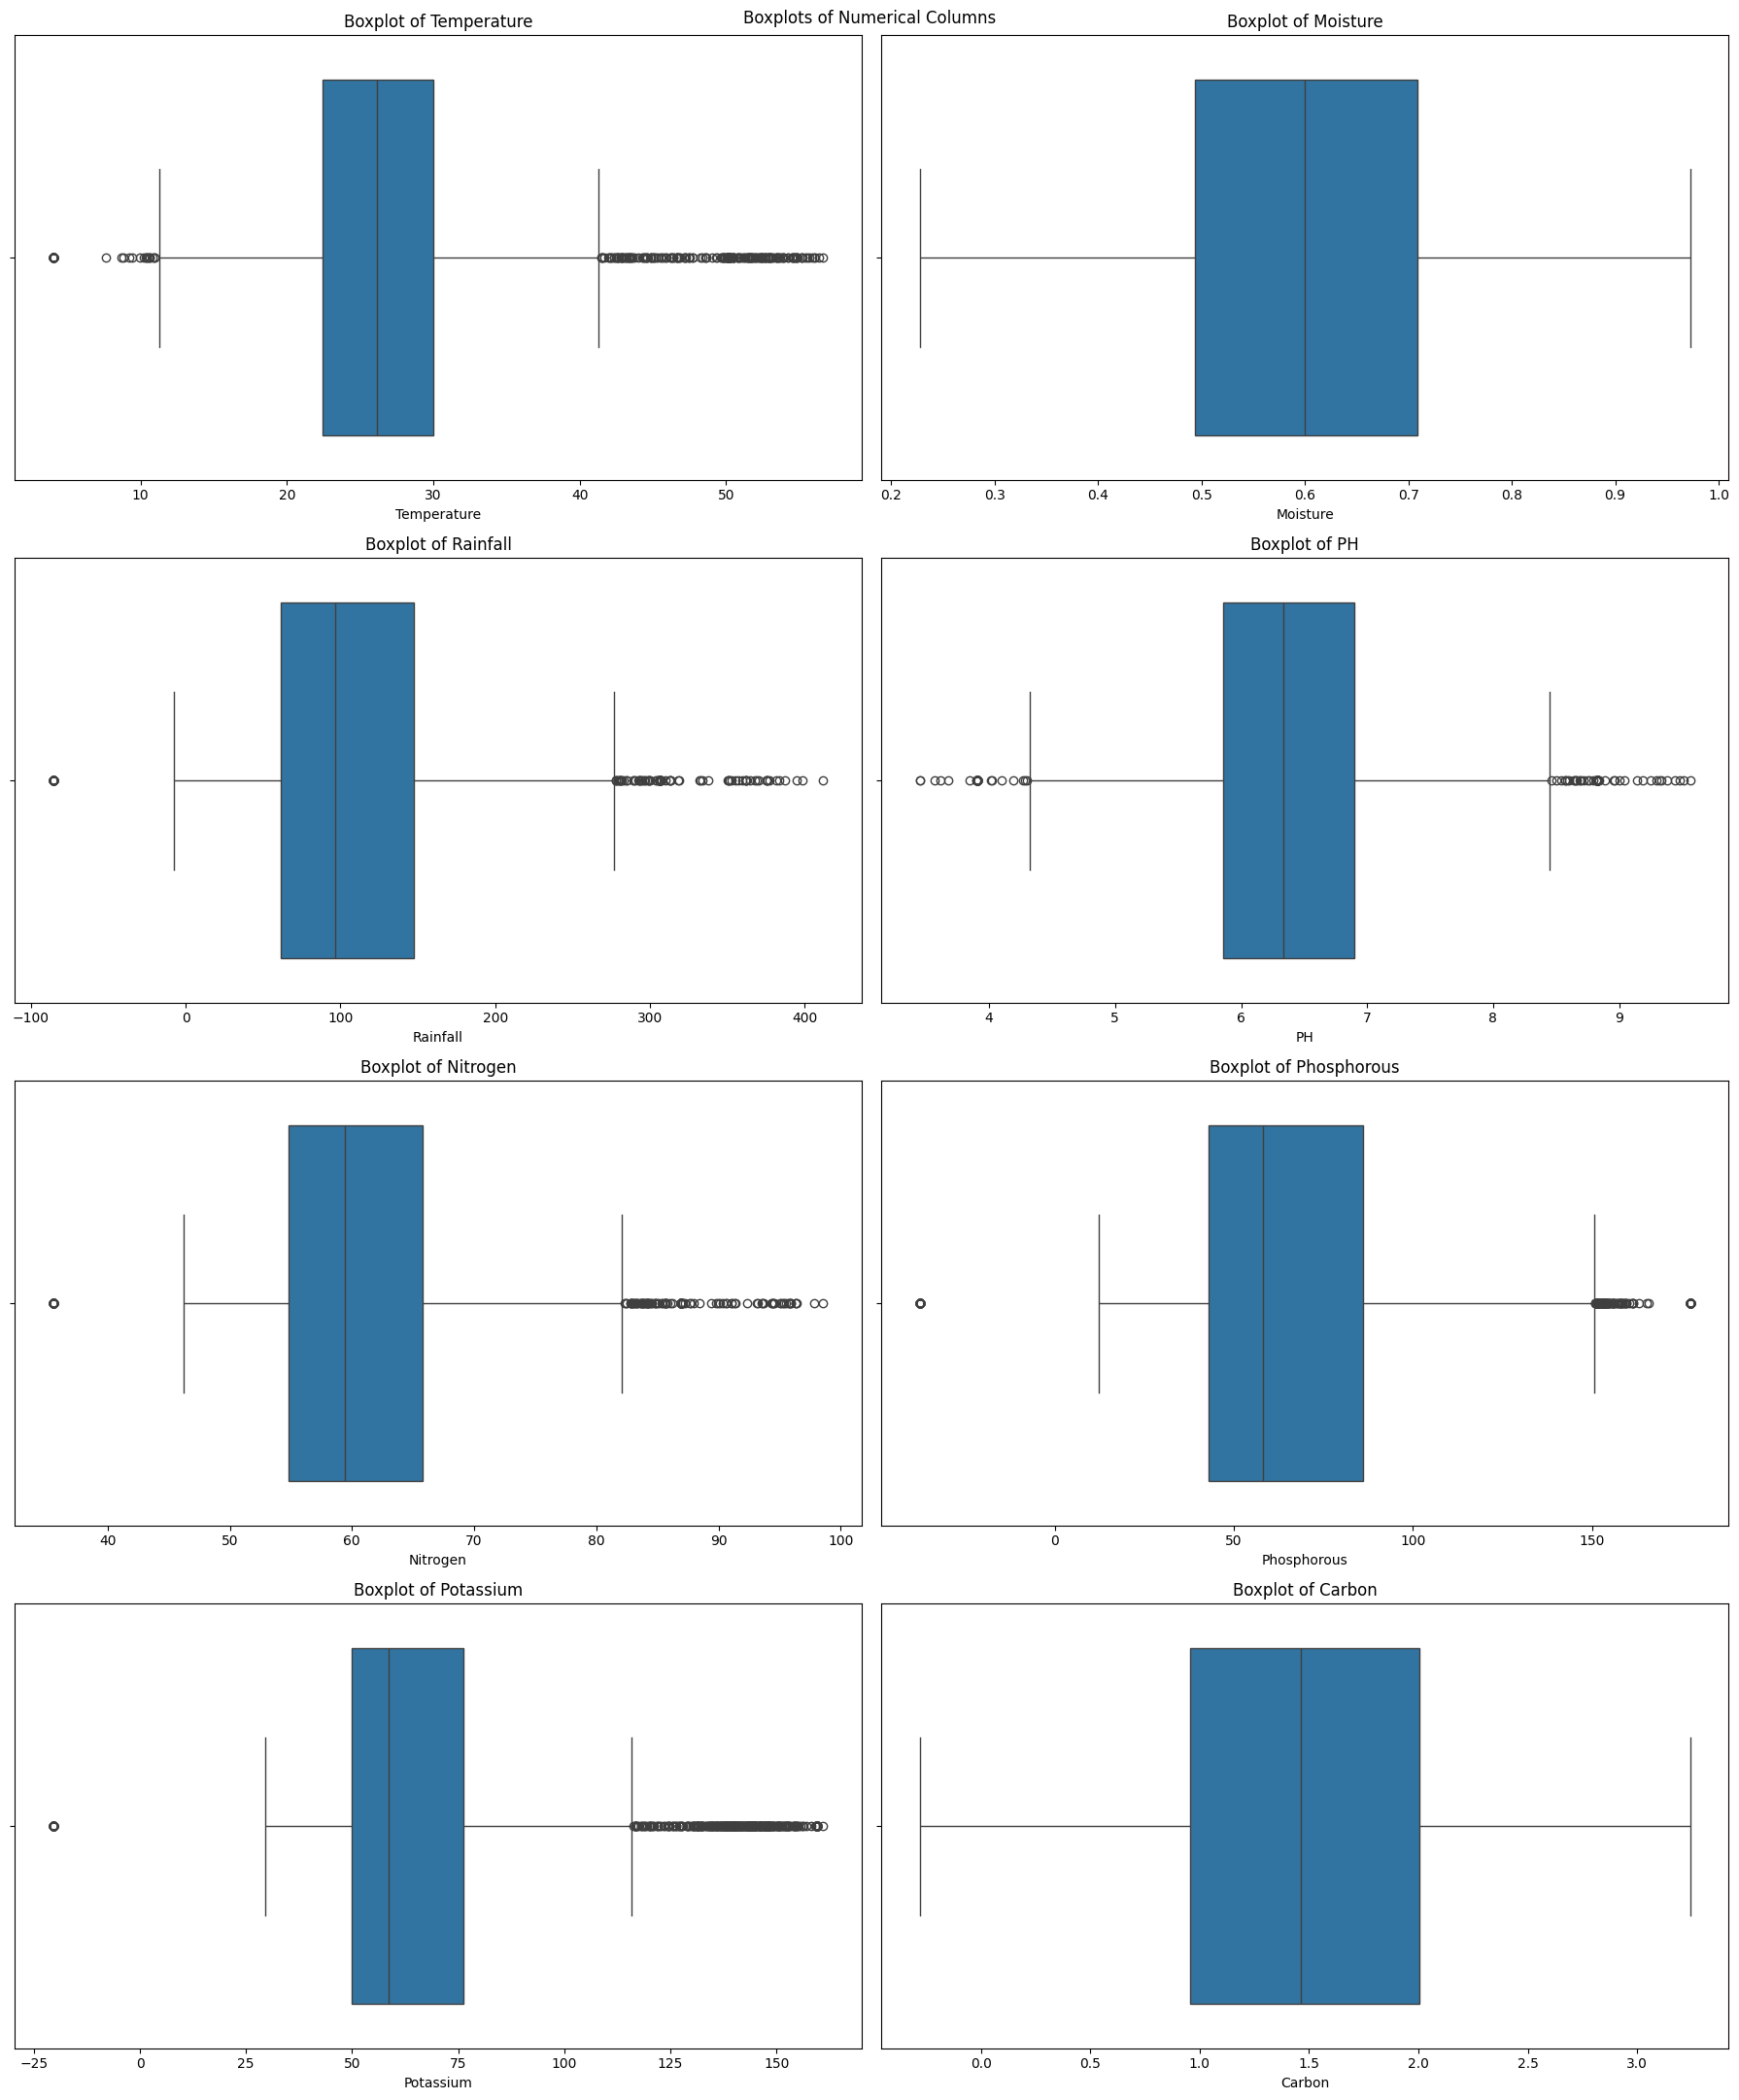

In [10]:
# Box plots for each numerical column
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(f"\nNumerical columns for outlier analysis: {numerical_cols}")
plt.figure(figsize=(18,22))

for i, col in enumerate(numerical_cols):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.suptitle('Boxplots of Numerical Columns')
plt.tight_layout()
plt.show()

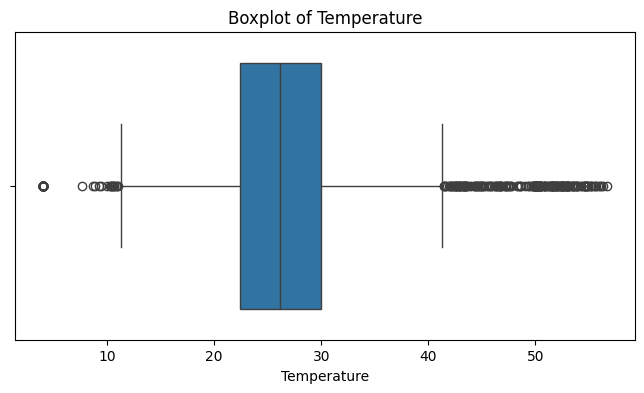

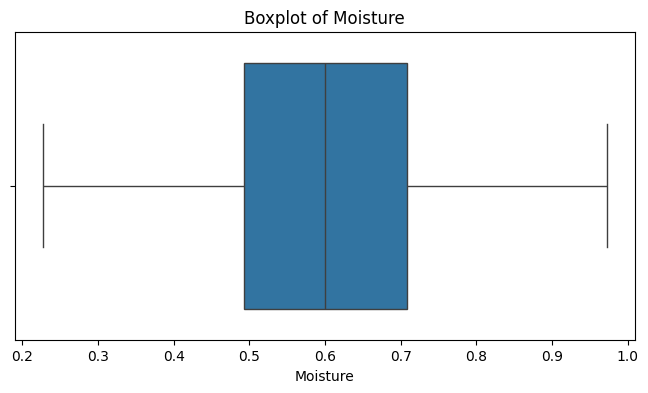

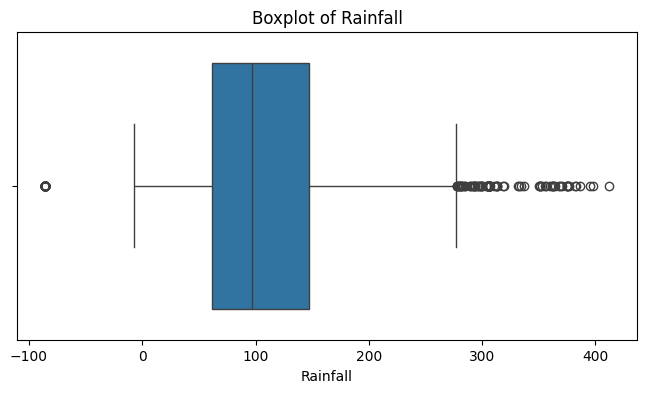

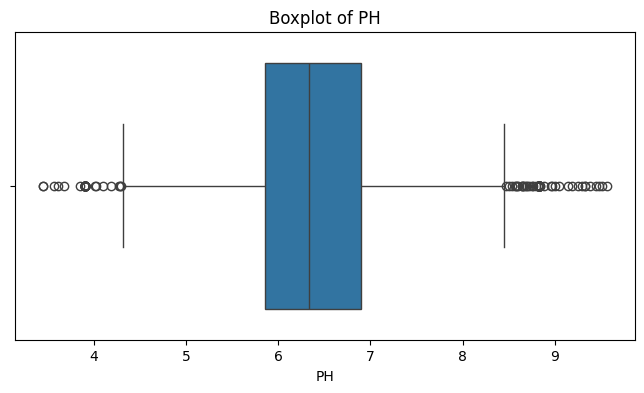

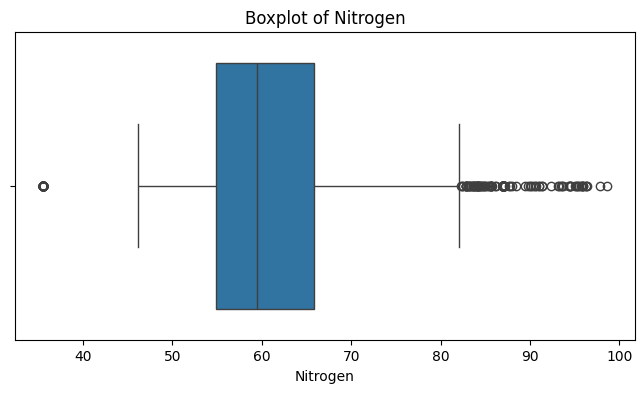

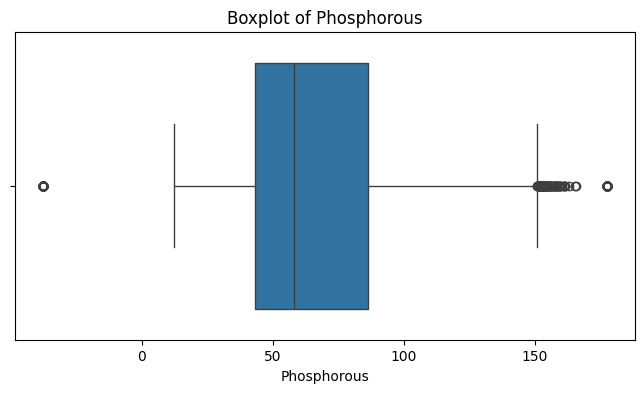

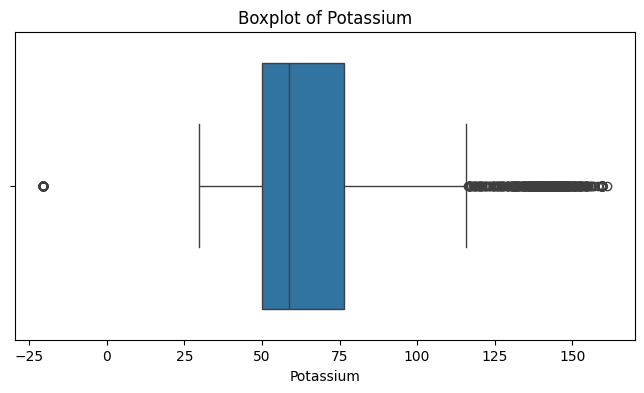

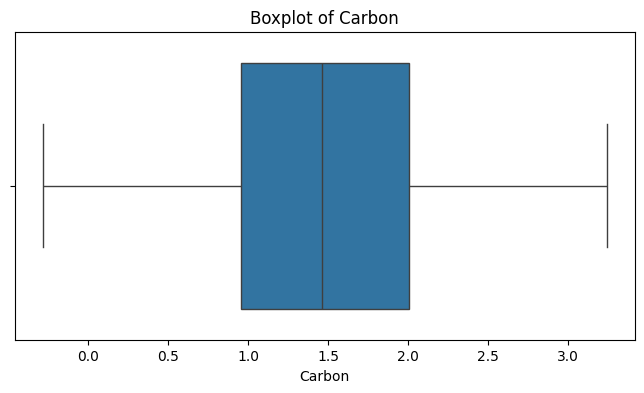

In [11]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

count    3100.000000
mean      111.024949
std        77.151880
min       -85.709593
25%        61.283985
50%        96.485935
75%       147.619401
max       411.955947
Name: Rainfall, dtype: float64


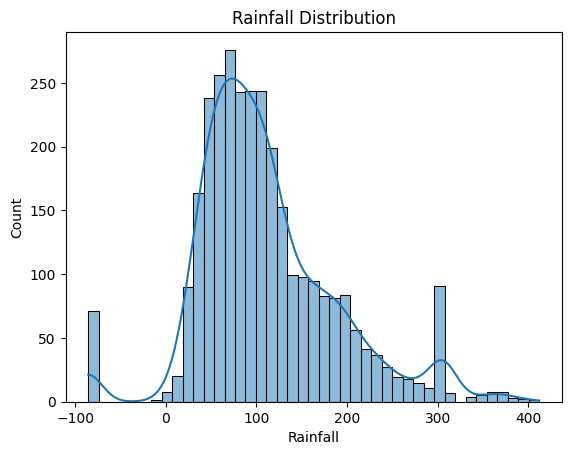

In [12]:
print(df['Rainfall'].describe())
sns.histplot(df['Rainfall'], kde=True)
plt.title('Rainfall Distribution')
plt.show()

In [13]:
# Define custom bounds
Q1 = df['Rainfall'].quantile(0.25)
Q3 = df['Rainfall'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = max(0, Q1 - 1.5 * IQR)  # Ensure no negative values
upper_bound = Q3 + 1.5 * IQR

# Filter out rows with outliers
df_cleaned = df[(df['Rainfall'] >= lower_bound) & (df['Rainfall'] <= upper_bound)]
print(f"Dataset size after removing outliers: {df_cleaned.shape}")

Dataset size after removing outliers: (2874, 12)


count    3100.000000
mean      111.024949
std        77.151880
min       -85.709593
25%        61.283985
50%        96.485935
75%       147.619401
max       411.955947
Name: Rainfall, dtype: float64


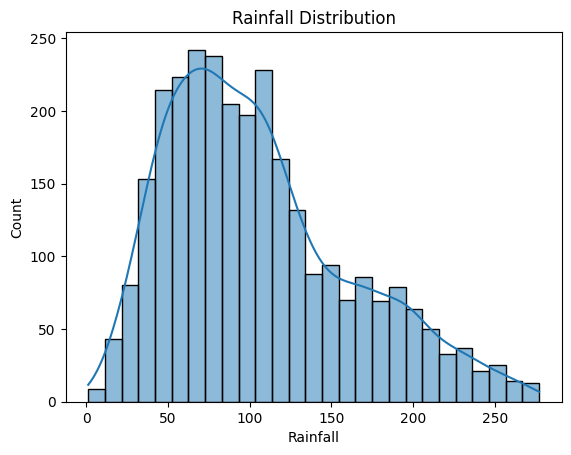

In [14]:
print(df['Rainfall'].describe())
sns.histplot(df_cleaned['Rainfall'], kde=True)
plt.title('Rainfall Distribution')
plt.show()

In [15]:
# Remove Outliers Using the IQR Method
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a mask for rows without outliers
mask = ~((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)

# Filter out rows with outliers
df_cleaned = df[mask]
print(f"Original dataset size: {df.shape}")
print(f"Dataset size after removing outliers: {df_cleaned.shape}")

Original dataset size: (3100, 12)
Dataset size after removing outliers: (1761, 12)


In [16]:
df.head()

,Temperature,Moisture,Rainfall,PH,Nitrogen,Phosphorous,Potassium,Carbon,Soil,Crop,Fertilizer,Remark
0,50.179845,0.725893,205.600816,6.227358,66.701872,76.963560,96.429065,0.496300,Loamy Soil,rice,Compost,Enhances organic matter and improves soil stru...
1,21.633318,0.721958,306.081601,7.173131,71.583316,163.057636,148.128347,1.234242,Loamy Soil,rice,Balanced NPK Fertilizer,"Provides a balanced mix of nitrogen, phosphoru..."
2,23.060964,0.685751,259.336414,7.380793,75.709830,62.091508,80.308971,1.795650,Peaty Soil,rice,Water Retaining Fertilizer,Improves water retention in dry soils. Prefer ...
3,26.241975,0.755095,212.703513,6.883367,78.033687,151.012521,153.005712,1.517556,Loamy Soil,rice,Balanced NPK Fertilizer,"Provides a balanced mix of nitrogen, phosphoru..."
4,21.490157,0.730672,268.786767,7.578760,71.765123,66.257371,97.000886,1.782985,Peaty Soil,rice,Organic Fertilizer,"Enhances fertility naturally, ideal for peaty ..."


In [17]:
df = df_cleaned


Numerical columns for outlier analysis: ['Temperature', 'Moisture', 'Rainfall', 'PH', 'Nitrogen', 'Phosphorous', 'Potassium', 'Carbon']


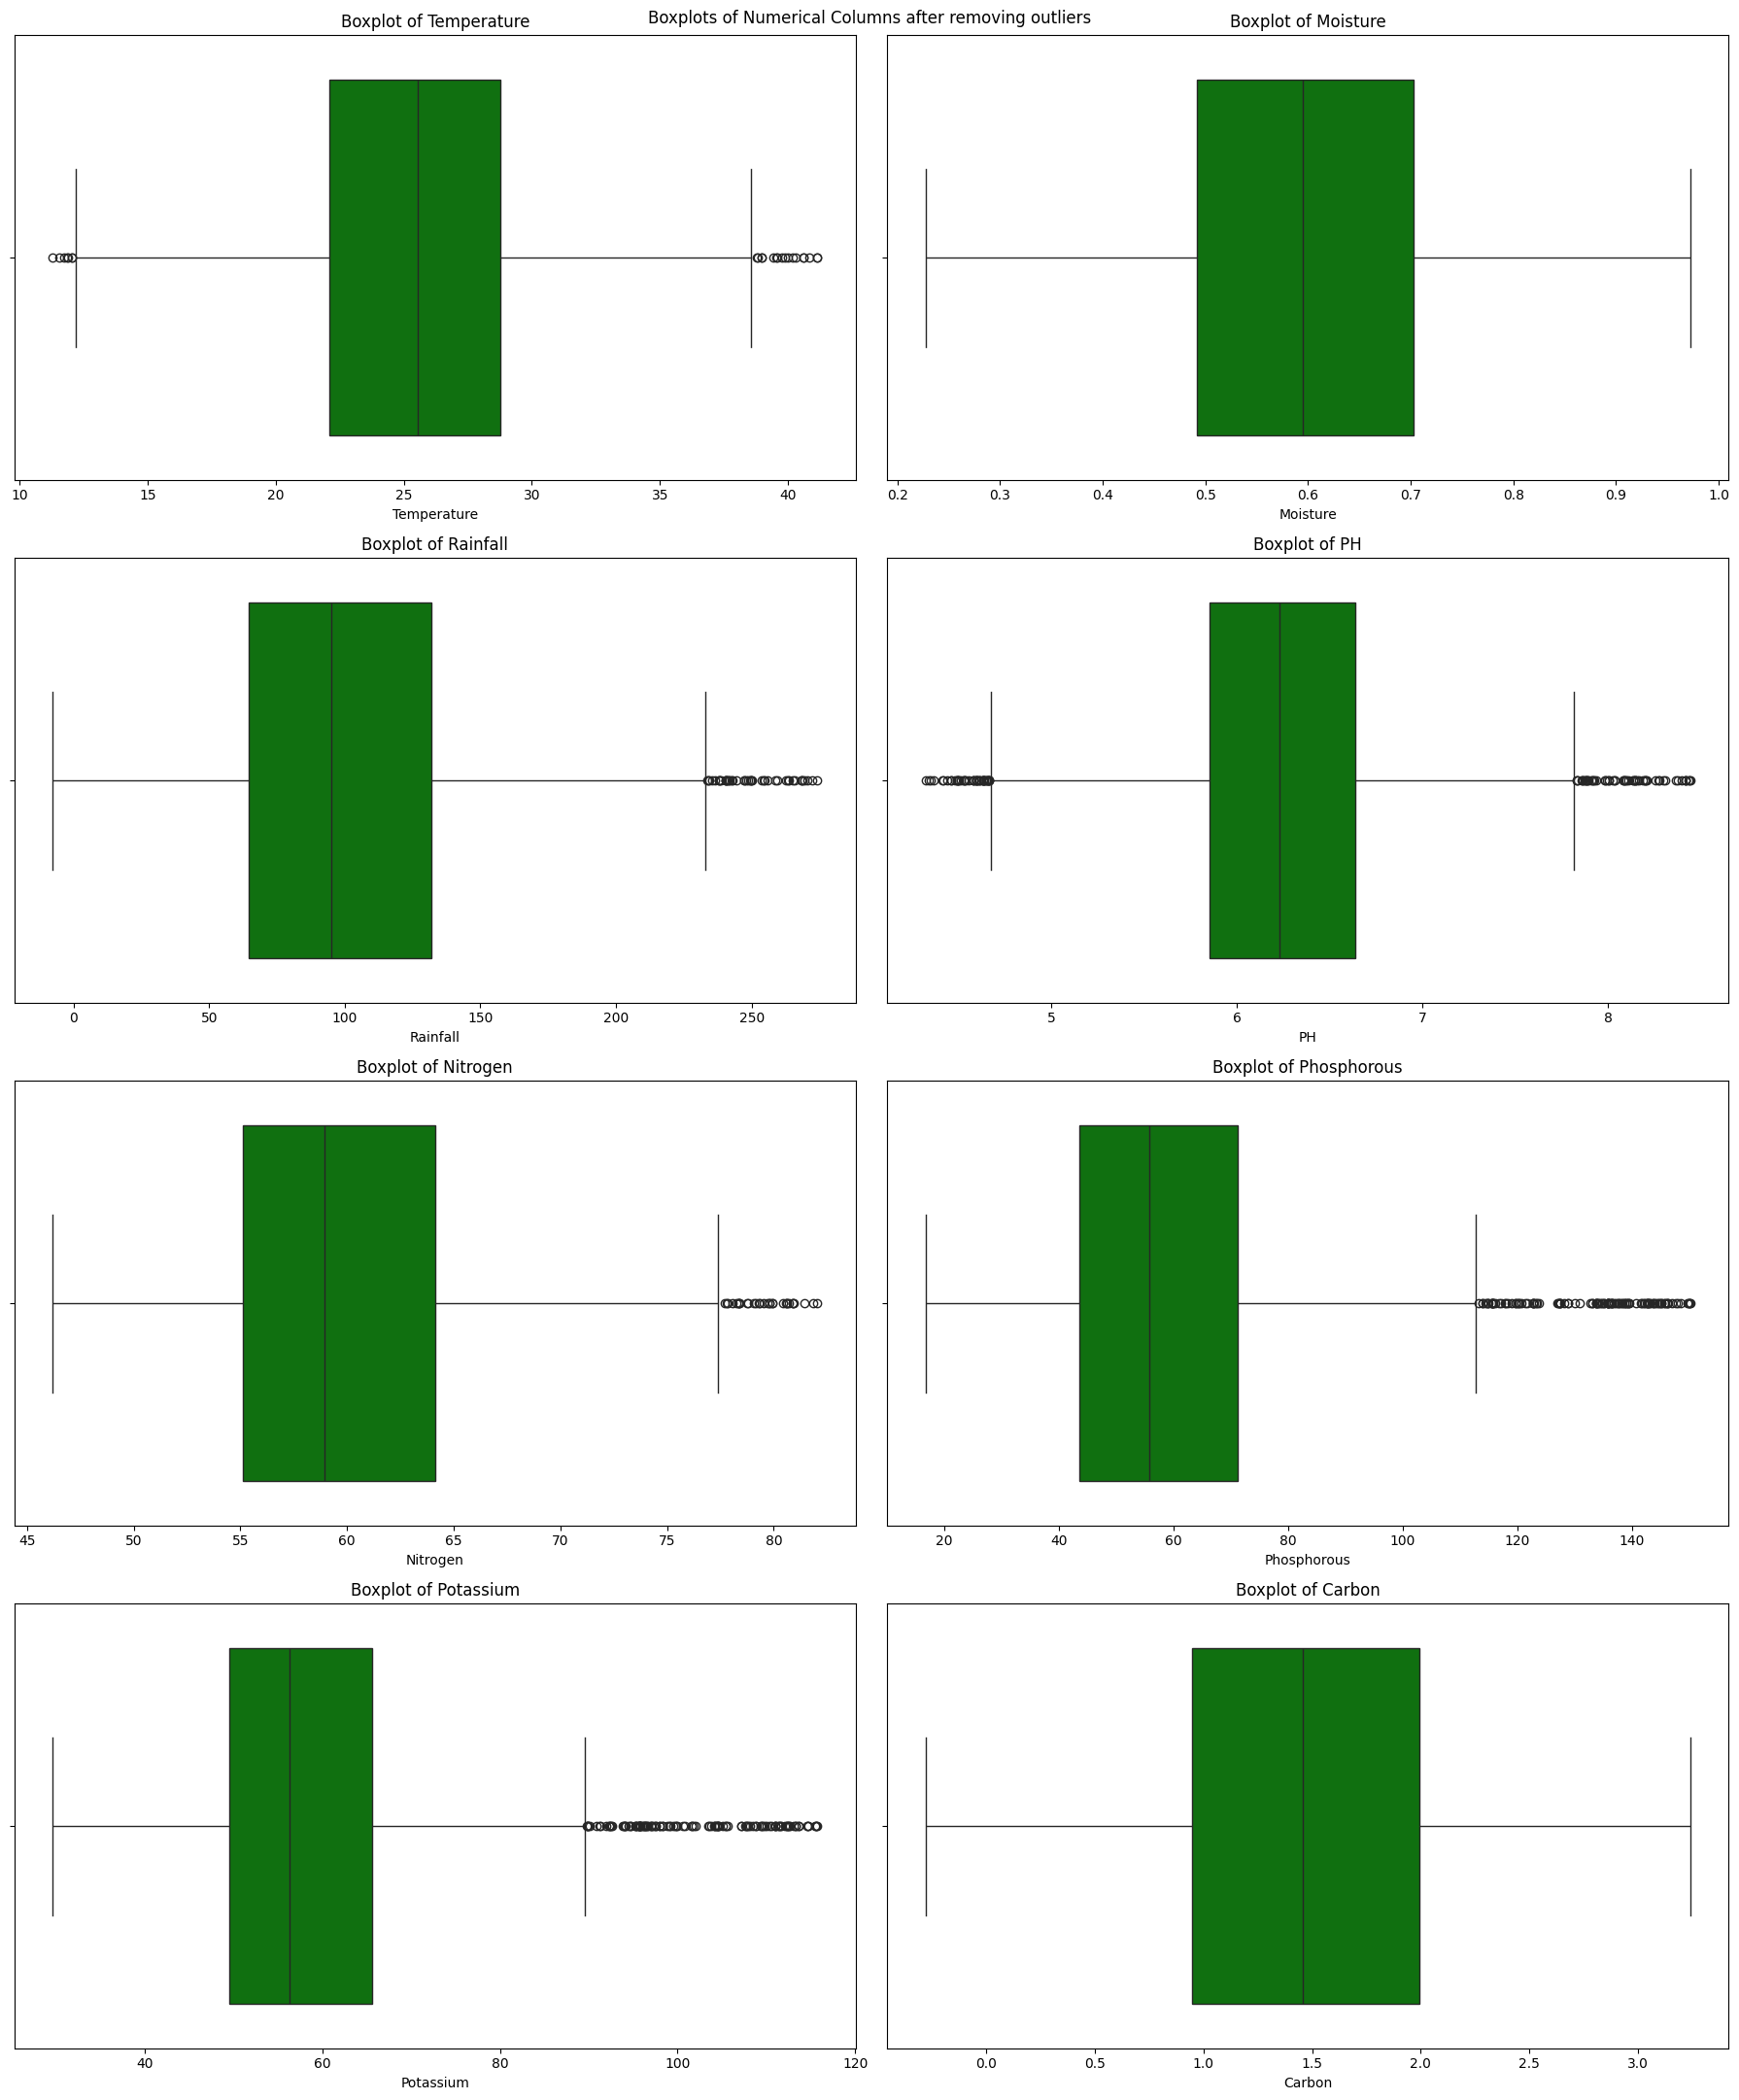

In [18]:
# Box plots for each numerical column after remving outlisers 
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(f"\nNumerical columns for outlier analysis: {numerical_cols}")
plt.figure(figsize=(18,22))

for i, col in enumerate(numerical_cols):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=df[col],color='green')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.suptitle('Boxplots of Numerical Columns after removing outliers')
plt.tight_layout()
plt.show()

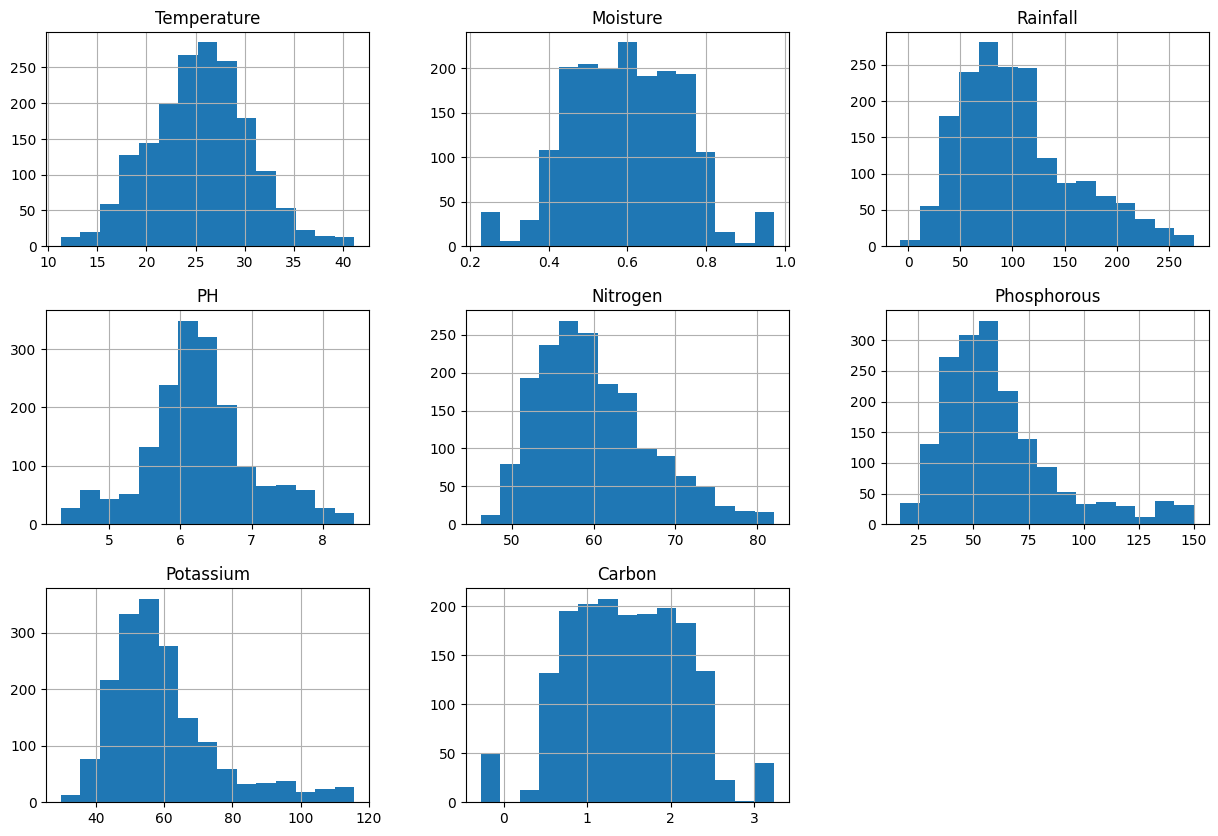

In [19]:
# Histograms for the numerical cols
df[['Temperature','Moisture','Rainfall','PH','Nitrogen', 'Phosphorous', 'Potassium','Carbon']].hist(bins=15, figsize=(15, 10))
plt.show()

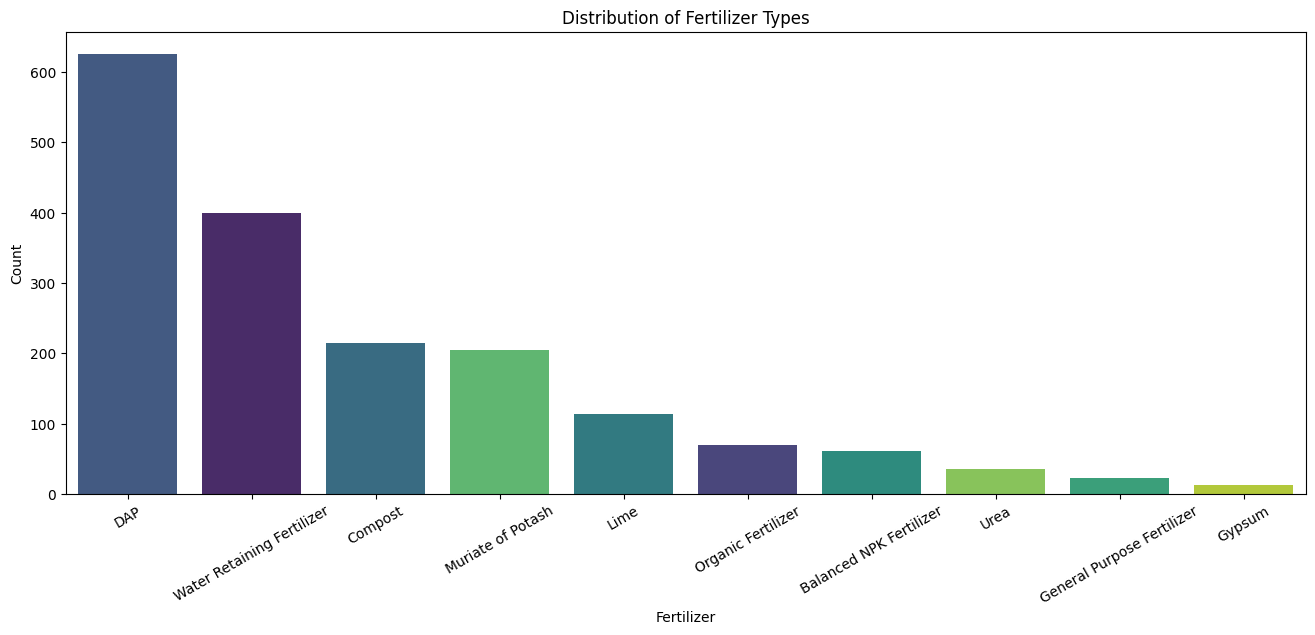

In [20]:
# Visualize fertilizer distribution
plt.figure(figsize=(16,6))
sns.countplot(x=df['Fertilizer'], order=df['Fertilizer'].value_counts().index, palette='viridis', hue=df['Fertilizer'])
plt.xticks(rotation=30)
plt.title('Distribution of Fertilizer Types')
plt.xlabel('Fertilizer')
plt.ylabel('Count')
plt.show()

<Axes: >

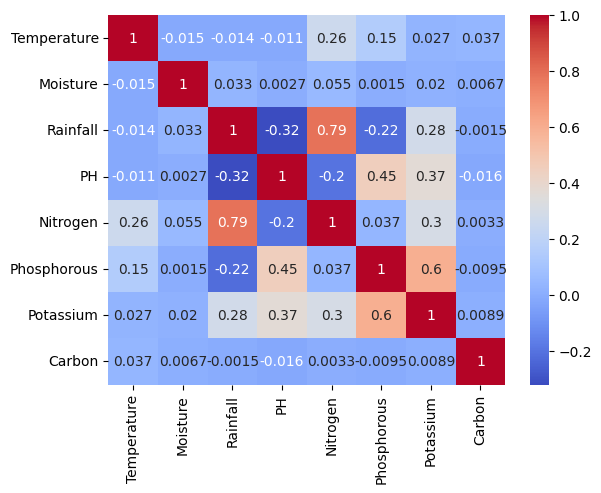

In [21]:
numerical_data = df.select_dtypes(include=['float64', 'int64'])
corr = numerical_data.corr()
sns.heatmap(corr,annot=True,cbar=True , cmap='coolwarm')

In [22]:
# Prepare features and target variables
x = df.drop(['Fertilizer', 'Remark'], axis=1)
y = df['Fertilizer']

In [23]:
# onehot encode for categorical varibales
x = pd.get_dummies(x, columns=['Soil', 'Crop'], drop_first=False, dtype=np.int64)

In [24]:
x.head()

,Temperature,Moisture,Rainfall,PH,Nitrogen,Phosphorous,Potassium,Carbon,Soil_Acidic Soil,Soil_Alkaline Soil,...,Crop_maize,Crop_mango,Crop_millet,Crop_muskmelon,Crop_orange,Crop_papaya,Crop_pomegranate,Crop_rice,Crop_watermelon,Crop_wheat
2,23.060964,0.685751,259.336414,7.380793,75.709830,62.091508,80.308971,1.795650,0,0,...,0,0,0,0,0,0,0,1,0,0
4,21.490157,0.730672,268.786767,7.578760,71.765123,66.257371,97.000886,1.782985,0,0,...,0,0,0,0,0,0,0,1,0,0
7,21.342227,0.785753,249.980185,5.692240,72.089121,42.591255,68.035609,2.410625,0,0,...,0,0,0,0,0,0,0,1,0,0
9,21.296925,0.783450,211.049382,6.386646,72.711484,68.352057,94.695401,2.464714,0,0,...,0,0,0,0,0,0,0,1,0,0
18,21.865816,0.869469,187.923879,6.109553,69.987401,52.729565,62.923918,1.182529,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
smote_enn = SMOTEENN(random_state=42)
x_resampled, y_resampled = smote_enn.fit_resample(x, y)

In [26]:
print("Original class distribution:")
print(Counter(y))

Original class distribution:
Counter({'DAP': 626, 'Water Retaining Fertilizer': 399, 'Compost': 215, 'Muriate of Potash': 205, 'Lime': 114, 'Organic Fertilizer': 70, 'Balanced NPK Fertilizer': 61, 'Urea': 36, 'General Purpose Fertilizer': 22, 'Gypsum': 13})


In [27]:
print("Class distribution after SMOTEENN:")
print(Counter(y_resampled))

Class distribution after SMOTEENN:
Counter({'Gypsum': 605, 'Urea': 596, 'Muriate of Potash': 565, 'Balanced NPK Fertilizer': 537, 'Organic Fertilizer': 519, 'General Purpose Fertilizer': 506, 'Lime': 502, 'DAP': 412, 'Compost': 309, 'Water Retaining Fertilizer': 175})


In [28]:
y_resampled

0          Balanced NPK Fertilizer
1          Balanced NPK Fertilizer
2          Balanced NPK Fertilizer
3          Balanced NPK Fertilizer
4          Balanced NPK Fertilizer
                   ...            
4721    Water Retaining Fertilizer
4722    Water Retaining Fertilizer
4723    Water Retaining Fertilizer
4724    Water Retaining Fertilizer
4725    Water Retaining Fertilizer
Name: Fertilizer, Length: 4726, dtype: object

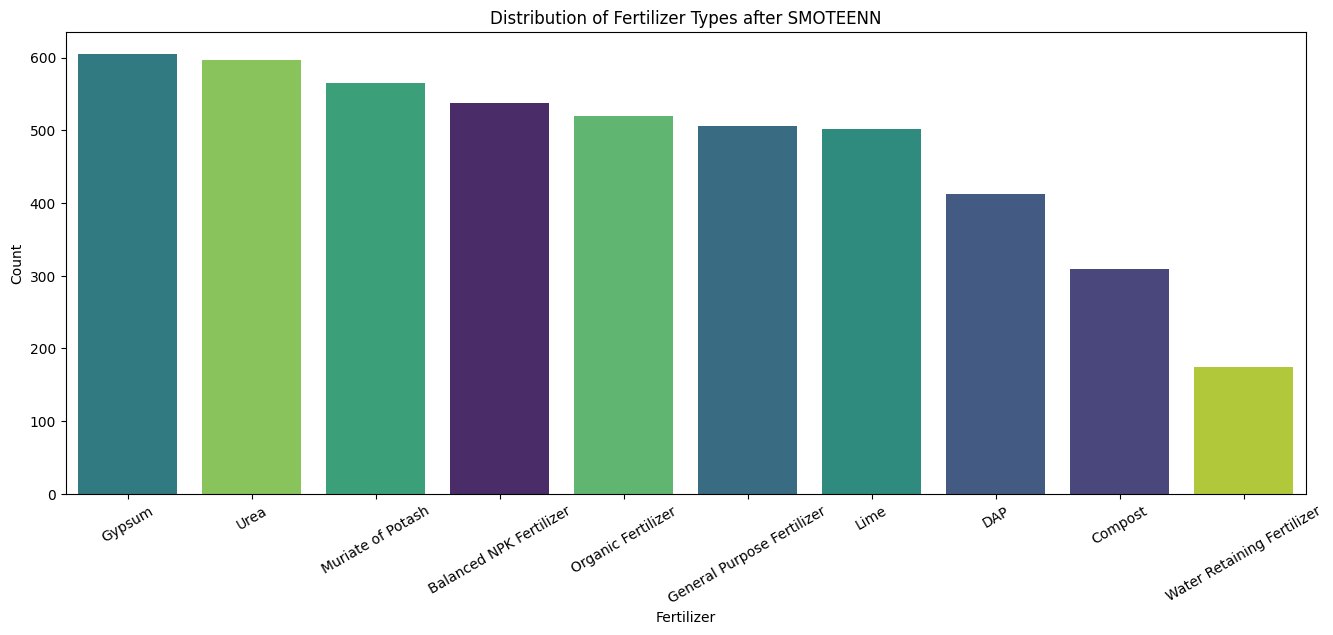

In [29]:
# Visualize fertilizer distribution after SMOTE
plt.figure(figsize=(16,6))
sns.countplot(x=y_resampled, order=y_resampled.value_counts().index, palette='viridis', hue=y_resampled)
plt.xticks(rotation=30)
plt.title('Distribution of Fertilizer Types after SMOTEENN')
plt.xlabel('Fertilizer')
plt.ylabel('Count')
plt.show()

In [30]:
# label encoder for fertilizer column
le = LabelEncoder()
y_encoded = le.fit_transform(y_resampled)
print('Enocded fertlizer types:\n')
for i, fertilizer in enumerate(le.classes_):
    print(f'{i}: {fertilizer}')

Enocded fertlizer types:

0: Balanced NPK Fertilizer
1: Compost
2: DAP
3: General Purpose Fertilizer
4: Gypsum
5: Lime
6: Muriate of Potash
7: Organic Fertilizer
8: Urea
9: Water Retaining Fertilizer


In [31]:
# split dataset for test and train
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_encoded, test_size=0.2, random_state=42)
print(f'Train set size: {x_train.shape}')
print(f'Test set size: {x_test.shape}')

Train set size: (3780, 43)
Test set size: (946, 43)


In [32]:
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(x_train, y_train)
rf_y_predict = rf_model.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_y_predict)
print(f'Random Forest Accuracy: {rf_accuracy}')
print(f'Detailed Classification Report: ')
print(classification_report(y_test, rf_y_predict, target_names=le.classes_))

Random Forest Accuracy: 0.9968287526427061
Detailed Classification Report: 
                            precision    recall  f1-score   support

   Balanced NPK Fertilizer       1.00      1.00      1.00       119
                   Compost       1.00      1.00      1.00        67
                       DAP       1.00      0.97      0.99        78
General Purpose Fertilizer       1.00      1.00      1.00       100
                    Gypsum       1.00      1.00      1.00       115
                      Lime       1.00      1.00      1.00       108
         Muriate of Potash       0.98      1.00      0.99       104
        Organic Fertilizer       1.00      1.00      1.00        88
                      Urea       0.99      1.00      1.00       123
Water Retaining Fertilizer       1.00      0.98      0.99        44

                  accuracy                           1.00       946
                 macro avg       1.00      1.00      1.00       946
              weighted avg       1.00 

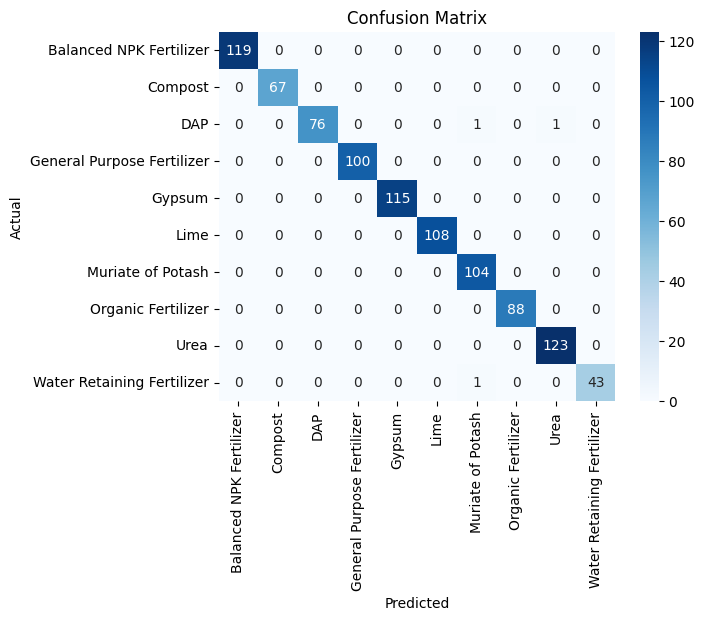

In [33]:
# confusion matrix

cm = confusion_matrix(y_test, rf_y_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [34]:
dt_model = DecisionTreeClassifier(class_weight='balanced')
dt_model.fit(x_train, y_train)
dt_y_predict = dt_model.predict(x_test)
dt_accuracy = accuracy_score(y_test, dt_y_predict)
print(f'Decision Tree Accuracy: {dt_accuracy}')
print(f'Detailed Classification Report: ')
print(classification_report(y_test, dt_y_predict, target_names=le.classes_))

Decision Tree Accuracy: 0.9989429175475687
Detailed Classification Report: 
                            precision    recall  f1-score   support

   Balanced NPK Fertilizer       1.00      1.00      1.00       119
                   Compost       1.00      1.00      1.00        67
                       DAP       1.00      0.99      0.99        78
General Purpose Fertilizer       1.00      1.00      1.00       100
                    Gypsum       1.00      1.00      1.00       115
                      Lime       1.00      1.00      1.00       108
         Muriate of Potash       0.99      1.00      1.00       104
        Organic Fertilizer       1.00      1.00      1.00        88
                      Urea       1.00      1.00      1.00       123
Water Retaining Fertilizer       1.00      1.00      1.00        44

                  accuracy                           1.00       946
                 macro avg       1.00      1.00      1.00       946
              weighted avg       1.00 

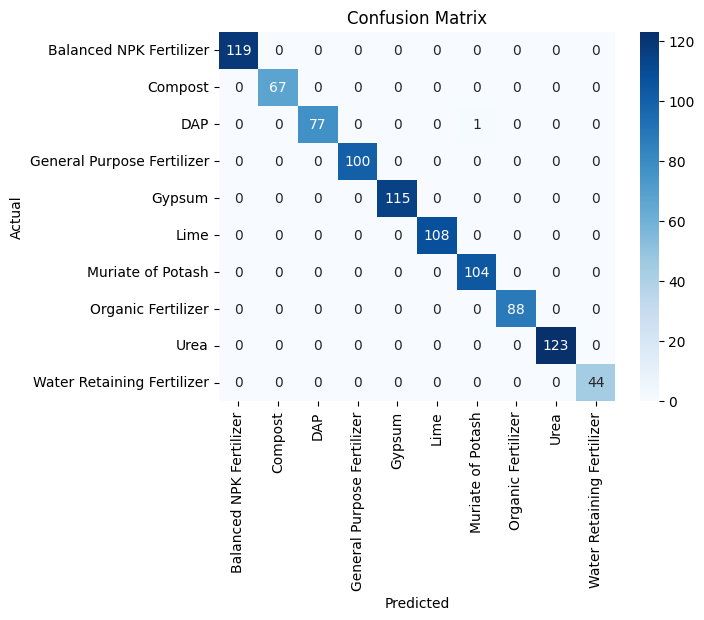

In [35]:
cm = confusion_matrix(y_test, dt_y_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()